In [2]:
# import zipfile
# import os

# # Path to the zip file
# zip_file_path = '/content/drive/MyDrive/NNDL/plant.zip'

# # Directory where you want to extract the files
# output_dir = '/content/drive/MyDrive/NNDL/'

# # Check if output directory exists, if not, create it
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Unzipping the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(output_dir)

# print(f'Files have been extracted to {output_dir}')


Files have been extracted to /content/drive/MyDrive/NNDL/


Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Potato___healthy: 152 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1119 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 0 images


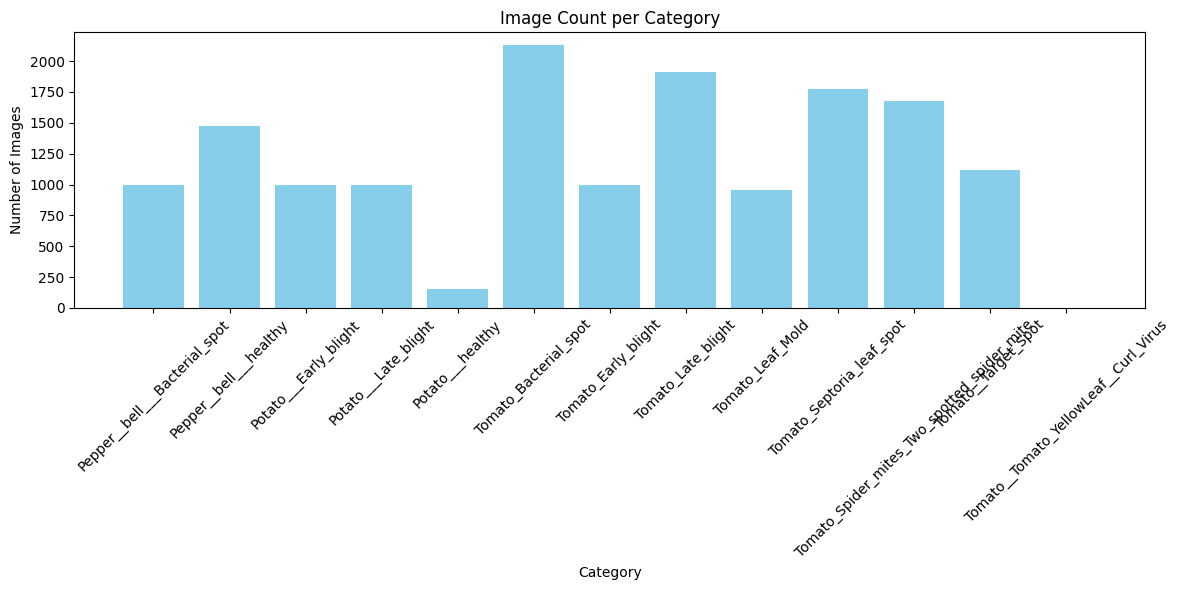

In [1]:
import os
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/MyDrive/NNDL/PlantVillage"

# List categories
categories = sorted(os.listdir(dataset_path))
image_counts = []

# Count images in each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts.append(len(image_files))
    print(f"{category}: {len(image_files)} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(categories, image_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Image Count per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


![Alt text](image-1.png)

In [4]:
# Use Path object instead of string
from pathlib import Path

# Get class names (folder names)
classes = sorted(os.listdir(dataset_path))

# Initialize empty lists
images_list = []
labels_list = []


In [5]:
#Preprocessing of Image & Label List Creation

import os
import numpy as np
from PIL import Image
from pathlib import Path

# Convert dataset_path to a Path object
dataset_path = Path(dataset_path)

# Loop through each class
for index, label in enumerate(classes):
    image_folder = dataset_path / label
    for image_path in image_folder.glob("*"):
        try:
            # Load image
            image = Image.open(image_path)

            # Convert to RGB if not already
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # Resize to 128x128
            image = image.resize((128, 128))

            # Convert to numpy array and append
            images_list.append(np.array(image))
            labels_list.append(index)
        except Exception as e:
            print(f"Failed to process {image_path}: {e}")

print("Total Images:", len(images_list))
print("Total Labels:", len(labels_list))

Failed to process /content/drive/MyDrive/NNDL/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c: cannot identify image file '/content/drive/MyDrive/NNDL/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c'
Total Images: 18674
Total Labels: 18674


In [14]:
print("Type of images_list:", type(images_list))
print("Shape of image in images_list:", images_list[0].shape)
print("Type of image in images_list:", type(images_list[0]))

Type of images_list: <class 'list'>
Shape of image in images_list: (128, 128, 3)
Type of image in images_list: <class 'numpy.ndarray'>


In [15]:
#Preprocessing of Image & Label List Convertion to NumPy Arrays
images_list = np.array(images_list)
labels_list = np.array(labels_list)

In [16]:
#Split Data to Train, Test & Validation
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(images_list, labels_list, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)
print("Pixel values of the first pixel (RGB) of image (BEFORE NORMALIZATION):", X_train[0][0][0])

X_train: (14446, 128, 128, 3)
X_test: (3096, 128, 128, 3)
X_val: (3096, 128, 128, 3)
Pixel values of the first pixel (RGB) of image (BEFORE NORMALIZATION): [127 127 127]


In [17]:

# Data Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0
print("Pixel values of the first pixel (RGB) of image (AFTER NORMALIZATION):", X_train[0][0][0])

Pixel values of the first pixel (RGB) of image (AFTER NORMALIZATION): [0.49803922 0.49803922 0.49803922]


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a generator to pass the data in batches with the augmentations
train_augmentations = ImageDataGenerator(
    # Rotation from -30 to +30 degrees
    rotation_range=0.4,
    # Shear by 20%
    shear_range=0.2,
    # Shift horizontally by 10%
    width_shift_range=0.1,
    # Shift vertically by 10%
    height_shift_range=0.1,
    # Flip horizontally
    horizontal_flip=True,
    # Fill new pixels with nearest existing pixel to not lose pixels
    fill_mode='nearest')

# Create a generator to pass the data in batches with the augmentations
train_generator = train_augmentations.flow(
    X_train,
    y_train,
    # 32 images will be passed at a time
    batch_size=32)


In [ ]:
# Test Augmentations & Test Generator
test_augmentations = ImageDataGenerator()

# Create a generator to pass the data in batches with the augmentations
test_generator = test_augmentations.flow(
    X_test,
    y_test,
    batch_size=32)

(128, 128, 3)


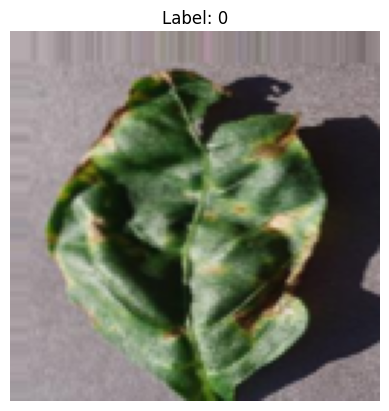

In [ ]:
#Plot Image from Train Generator

images_batch, labels_batch = next(train_generator)
# Take the first image from the batch
image_to_preview = images_batch[0]

print(image_to_preview.shape)
# Display the image
plt.imshow(image_to_preview)
plt.title(f"Label: {labels_batch[0]}")
plt.axis('off')
plt.show()

In [ ]:
# Check for and handle invalid labels in y_train and y_val
# Find unique labels in y_train and y_val
unique_labels_train = np.unique(y_train)
unique_labels_val = np.unique(y_val)

# Print the unique labels for inspection
print("Unique labels in y_train:", unique_labels_train)
print("Unique labels in y_val:", unique_labels_val)

# Check if any labels are outside the valid range [0, num_classes - 1]
num_classes = 11  # Number of classes your model is designed for
invalid_labels_train = [label for label in unique_labels_train if label >= num_classes]
invalid_labels_val = [label for label in unique_labels_val if label >= num_classes]

if invalid_labels_train:
    print(f"Warning: Invalid labels found in y_train: {invalid_labels_train}")
    # Handle invalid labels (e.g., remove or reassign)
    # For example, to remove samples with invalid labels:
    valid_indices_train = np.where(y_train < num_classes)[0]
    X_train = X_train[valid_indices_train]
    y_train = y_train[valid_indices_train]

if invalid_labels_val:
    print(f"Warning: Invalid labels found in y_val: {invalid_labels_val}")
    # Handle invalid labels (e.g., remove or reassign)
    # For example, to remove samples with invalid labels:
    valid_indices_val = np.where(y_val < num_classes)[0]
    X_val = X_val[valid_indices_val]
    y_val = y_val[valid_indices_val]

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]


In [ ]:

#Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

Custom Model (ResNet50V2_model)

In [ ]:
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50
import keras

input_shape = X_train.shape[1:]

base_model = ResNet50V2(include_top=False, input_shape=input_shape)
base_model.trainable = False

ResNet50V2_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(224, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(11, activation="softmax")
])

ResNet50V2_model.summary()

ResNet50V2_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 4, 4, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │       458,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,053,995 (91.76 MB)

 Trainable params: 489,195 (1.87 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
ResNet50V2_history = ResNet50V2_model.fit(X_train, y_train,
                                          epochs=6,
                                          batch_size=32,
                                          validation_data=(X_val, y_val),
                                          callbacks=[early_stopping, lr_scheduler]
                                         )

Epoch 1/6
233/233 ━━━━━━━━━━━━━━━━━━━━ 636s 3s/step - accuracy: 0.4944 - loss: 1.5849 - val_accuracy: 0.7965 - val_loss: 0.5891 - learning_rate: 0.0010
Epoch 2/6
233/233 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.7415 - loss: 0.7341 - val_accuracy: 0.8447 - val_loss: 0.4661 - learning_rate: 0.0010
Epoch 3/6
233/233 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.8165 - loss: 0.5284 - val_accuracy: 0.8510 - val_loss: 0.4297 - learning_rate: 0.0010
Epoch 4/6
233/233 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.8396 - loss: 0.4685 - val_accuracy: 0.8723 - val_loss: 0.3876 - learning_rate: 0.0010
Epoch 5/6
233/233 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step - accuracy: 0.8636 - loss: 0.4053 - val_accuracy: 0.8754 - val_loss: 0.4020 - learning_rate: 0.0010
Epoch 6/6
233/233 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.8794 - loss: 0.3455 - val_accuracy: 0.8867 - val_loss: 0.3501 - learning_rate: 0.0010


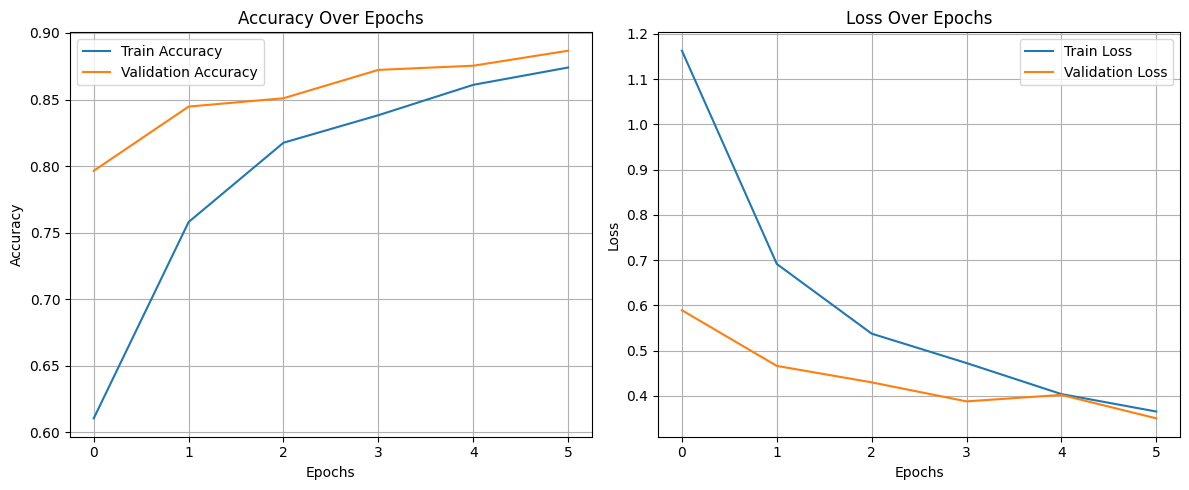

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(ResNet50V2_history.history['accuracy'], label='Train Accuracy')
plt.plot(ResNet50V2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(ResNet50V2_history.history['loss'], label='Train Loss')
plt.plot(ResNet50V2_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = ResNet50V2_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8938 - loss: 0.3049
Test Accuracy: 0.8986
Test Loss: 0.3149


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = ResNet50V2_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=sorted(os.listdir(dataset_path))))

50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step
                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.95      0.82      0.88       153
       Pepper__bell___healthy       0.90      0.97      0.93       239
        Potato___Early_blight       0.92      0.96      0.94       148
         Potato___Late_blight       0.89      0.92      0.90       154
             Potato___healthy       0.80      0.67      0.73        18
        Tomato_Bacterial_spot       0.96      0.96      0.96       334
          Tomato_Early_blight       0.68      0.79      0.73       134
           Tomato_Late_blight       0.91      0.87      0.89       285
             Tomato_Leaf_Mold       0.93      0.82      0.87       132
    Tomato_Septoria_leaf_spot       0.00      0.00      0.00         1

                     accuracy                           0.90      1598
                    macro avg       0.79      0.78      0.78      1598
                 weighted avg      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


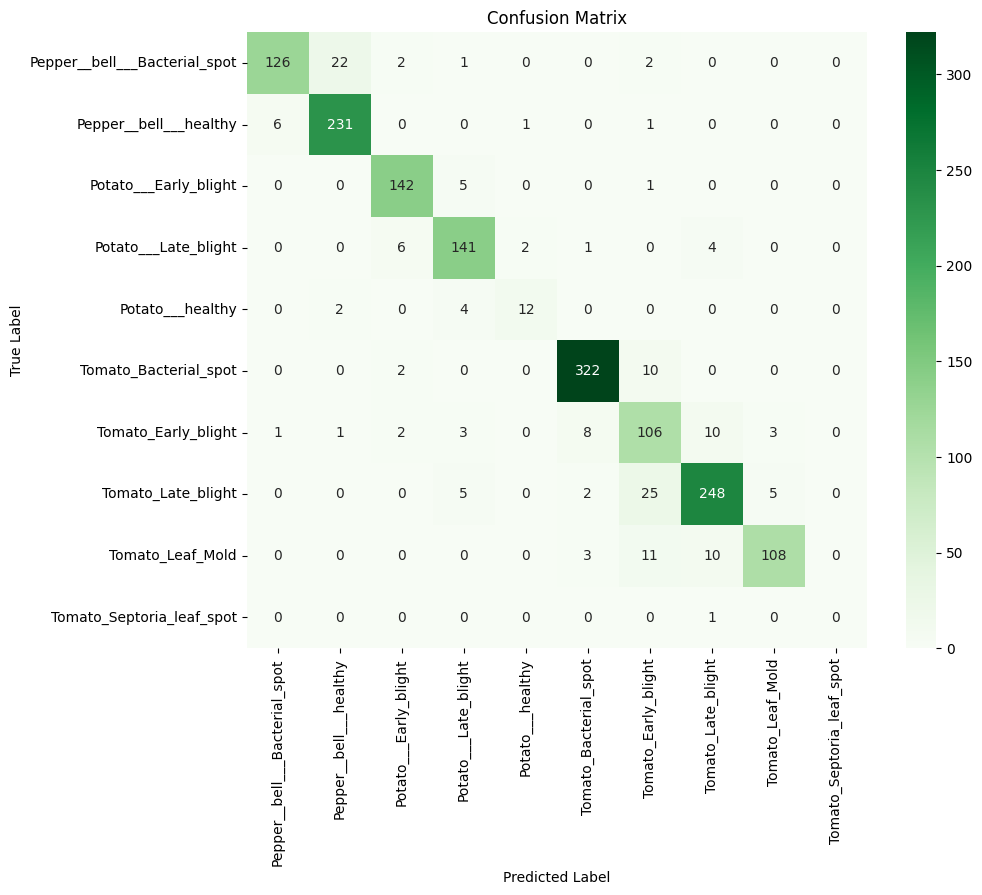

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
labels = sorted(os.listdir(dataset_path))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

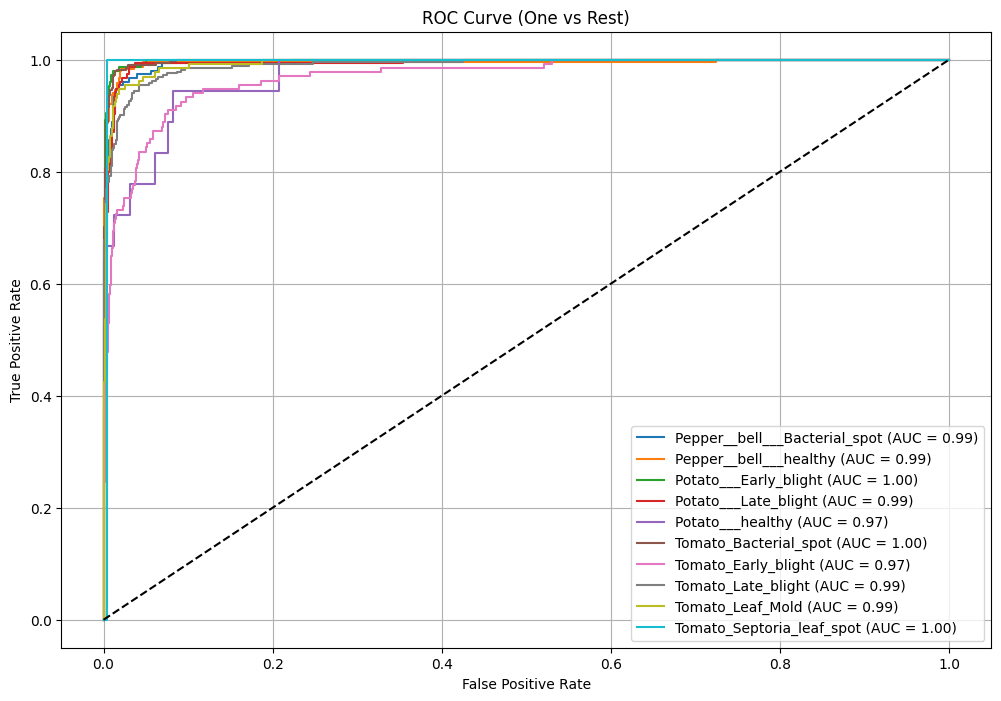

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize y_test for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=list(range(len(labels))))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (One vs Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
